## Homework 4 (Question 5)

For this question, you will write a function for applying Gaussian mixture model clustering to an input dataset. Note that you must write your own functions to perform the clustering and avoid using GaussianMixture() or any other functions provided by scikit-learn. The functions you may use are listed below:

- numpy functions for creating and manipulating ndarrays (sum(), reshape(), concatenate(), argmax(), eye(), zeros())
- pandas library for loading, displaying, and plotting the data (read_csv() and head()).
- matplotlib library for plotting
- scipy multivariate_normal() to compute the density function for normal (Gaussian) distribution.

If you're unsure whether you can use some function, please email the instructor.

**Step 1:** Download the file *data.txt* from D2L and load it to a pandas object named data. The dataset contains 30 data points. The first 10 points belong to cluster 0, the next 10 points belong to cluster 1, and the last 30 points belong to cluster 2. Display the first 5 lines of the file.

In [170]:
import pandas as pd
import numpy as np

data = pd.read_csv( "data.txt" , header= None , delimiter= " " )
labels = np.concatenate((np.zeros((10,)), np.ones((10,)), 2*np.ones((10,))), axis=0).astype(int)
data.head()

,0,1
0,1.3510,5.3644
1,3.1812,8.8795
2,1.2415,4.3369
3,0.8904,7.6155
4,1.1544,6.1375


**Step 2:** Display the ground truth clusters of the 30 data points. The display() function takes 3 input arguments: the input data (as numpy array), the cluster labels, and a string for the title of the plot. Use plt.scatter() to draw the points. Fill in the missing portion in the display() function and on the last line of the cell below.

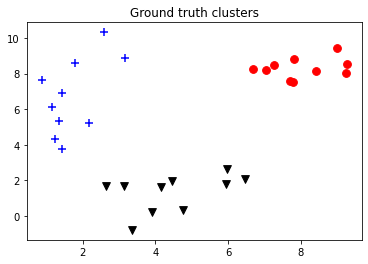

In [171]:
import matplotlib.pyplot as plt
import numpy as np

def display(data, labels, titlestr):
    for i in range(data.shape[0]):
        if labels[i] == 0:
            plt.scatter(  data[0][i], data[1][i] ,c='b',s=60,marker='+')
        elif labels[i] == 1:
            plt.scatter(  data[0][i], data[1][i] ,c='r',s=60,marker='o')
        else:
            plt.scatter( data[0][i], data[1][i] ,c='k',s=60,marker='v')
    plt.title(titlestr)
            
display(  data  , labels, 'Ground truth clusters')

**Step 3:** Write an implementation of the Gaussian mixture model clustering function using the Expectation Maximization (EM) algorithm.  The function takes as input the following input arguments: (1) data (input data as 2-dimensional ndarray) (2) mu (initial mean vectors for the 3 clusters) (3) sigma (initial covariance matrices for the 3 clusters), (4) pi (prior cluster probability), (5) maxiter (maximum number of iterations), and (6) verbose (a Boolean flag to display intermediate results). For the given input data (a matrix of size 30 x 2), since we need to partition it into 3 clusters, the mean vector is a 3 x 2 matrix, Sigma is an array that contains 3 covariance matrices, each of size 2 x 2, and pi is a 3-dimensional ndarray.  

The pseudocode of the EM algorithm is as follows:
- Let $X$ be the input data
- Initialize $\mu$: mean vector, $\Sigma$: covariance, $\pi$: cluster prior probability.
- Initialize w to be a matrix of size 30 x 3 (where the rows correspond to
- for i = 1 to maxiter do
    - #### Expectation Step ####
        - Update $w$ as follows: $w_{ij} = \frac{\pi_j N(x_i | \mu_j, \Sigma_j)}{\sum_{k=1}^3 \pi_k N(x_i | \mu_k, \Sigma_k)}$ (**Note:** use scipy.stats.multivariate_normal to compute $N(x_i | \mu_k, \Sigma_k)$)
    - #### Maximization Step. 
        Make sure you update the parameters in the order shown below (with $N = 30$):
        - Update the covariance matrix for each cluster $j$ as follows: $\Sigma_j = \frac{\sum_{i=1}^{N} w_{ij} (x_i-\mu_j)(x_i - \mu_j)^T}{\sum_{i=1}^{N} w_{ij}}$
        - Update the mean vector for each cluster $j$ as follows: $\mu_j = \frac{\sum_{i=1}^{N} w_{ij} x_i}{\sum_{i=1}^{N} w_{ij}}$
        - Update the prior probability for cluster $j$ as follows: $\pi_j = \frac{\sum_{i=1}^{N} w_{ij}}{N}$
- end
- for $i$ = 1 to $N$ do
    - cluster($i$) = $\arg\max_j w_{ij}$ (column index $j$ with largest $w_{ij}$ value)
- end

In [172]:
from scipy.stats import multivariate_normal

def gmm(data, mu, sigma, pi, maxiter, verbose=False):
    
    data = np.asarray(data) 

    n_points = len(data)
    n_cols = data.shape[1]
    n_components = 3
    
    w = np.zeros((n_points,n_components))  # Initialize w as a matrix of size (#points, #clusters)
    
    for i in range(maxiter):
        
        # Expectation Step - update w
        for j in range(n_points):
            for k in range(n_components):
                w[j, k] = pi[k]*multivariate_normal.pdf(data[j],mu[k],sigma[k])
        w_sums = w.sum(axis=1)[:, np.newaxis]
        w = w / w_sums 
        
        # Maximization Step - update mu, sigma, pi
        counts = np.sum(w, axis=0)
        
        for k in range(n_components):
            
            # sigma calculation: 
            
            weighted_sum = np.zeros((n_cols, n_cols))
            for j in range(n_points):
                weighted_sum += (w[j,k]*np.outer(data[j]-mu[k],data[j]-mu[k]))
            sigma[k] = weighted_sum/counts[k]
            
            # prior probability (pi) calculation:
            
            pi[k] = counts[k]/n_points
            
            # means (mu) calculation: 
            
            weighted_sum = 0
            for j in range(n_points):
                weighted_sum += (w[j,k]*data[j])
            mu[k] = weighted_sum/counts[k]
            
        # Code to display intermediate results 
        if verbose:
            print('\nIteration %d' % (i))
            print('pi: ', pi)
            print('mu:', mu)
            print('sigma:', sigma)
            
    for i in range(n_points):
        clusters = np.argmax(w, axis=1)
    
    return (clusters, w, mu, sigma, pi) 

**Step 4:** Run the program using the initial values provided. Set maxiter to be 3 and verbose flag to be True. Display the clustering results.


Iteration 0
pi:  [0.25571064 0.44911935 0.29517   ]
mu: [[3.09410702 1.59473002]
 [3.44791143 5.75460918]
 [8.14084579 8.34574711]]
sigma: [array([[ 5.73778356, -0.29612627],
       [-0.29612627,  3.07859535]]), array([[ 7.18152409, -4.06538969],
       [-4.06538969,  8.55754384]]), array([[4.17368503, 3.20265406],
       [3.20265406, 3.04193426]])]

Iteration 1
pi:  [0.26823105 0.40730466 0.32446429]
mu: [[3.82789199 1.59432001]
 [2.72859708 5.72835537]
 [8.02715005 8.30562291]]
sigma: [array([[ 2.59788441, -0.70169641],
       [-0.70169641,  2.24237682]]), array([[ 3.82370087, -2.29039861],
       [-2.29039861,  8.14012138]]), array([[0.88003069, 0.20149589],
       [0.20149589, 0.34137241]])]

Iteration 2
pi:  [0.27993541 0.38733347 0.33273112]
mu: [[4.12697372 1.51398871]
 [2.37029795 5.85057156]
 [8.02230804 8.31232373]]
sigma: [array([[ 2.08726656, -0.27351185],
       [-0.27351185,  1.68923564]]), array([[ 2.3916856 , -1.87736399],
       [-1.87736399,  7.7569511 ]]), array([[0

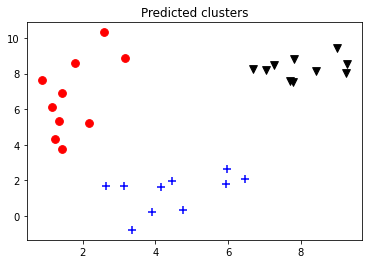

In [173]:
mu = np.array([[1.0,1.0],[5.0,5.0],[10.0,10.0]])
sigma = [np.eye(2),np.eye(2), np.eye(2)]
pi = np.array([1/3, 1/3, 1/3])
clusters, w, mu2, sigma2, pi2 = gmm(data, mu, sigma, pi, maxiter =3, verbose = True)
display( data  , clusters, 'Predicted clusters')

**Step 5:** For comparison purpose, the following is the result of Gaussian mixture model clustering using scikit-learn.

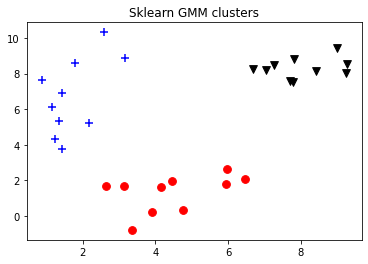

In [179]:
from sklearn import mixture

gmm = mixture.GaussianMixture(n_components=3, covariance_type='full').fit(data.values)
clusters = gmm.predict(data.values)
display( data , clusters, 'Sklearn GMM clusters')